In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.polynomial import Polynomial
from scipy.optimize import fsolve

from cohort_model import run_cohort_simulation, get_mean_and_std, MUT_CAPTIVITY, HYP_WILDTYPE

# Calculations for Figure 2 in Technical comment XYZ

**SKRIV FORKLARING PÅ HVA SOM ER I DENNE NOTEBOOKEN**


## Left inserted panel: STIG STIG STIG :)

### Fit a polynomial function to *Testudo graeca* mortality risk data
First, we fit a polynomial function to the mortality risk data for *T. graeca* females. The mortality risk data were extracted from materials kindly provided by Fernando Colchero in private correspondence.

All age data in this notebook are adjusted to post sexual maturation (psm), such that time *t* = 0 is set to age at first reproduction. For *T. graeca* this is set to 10 years of age, as reported in Table S2 in Supplementary Materials of da Silva *et al.* (2022).

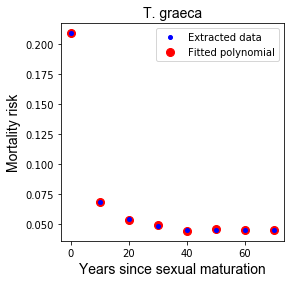

In [2]:
# Extracted mean annual mortality risk for T. graeca females in captivity
years_spaced = np.array([0, 10, 20, 30, 40, 50, 60, 70]) # Years psm
mortality_risk_spaced = [0.2091, 0.0682, 0.0545, 0.0482, 0.0455, 0.0455, 0.0455, 0.0455]

# Get the least squares polynomial fit to the data
fitted_polynomial = Polynomial.fit(x=years_spaced, y=mortality_risk_spaced, deg=6)

# Evaluate fitted polynomial function values at same years as in extracted data
fitted_polynomial_values_spaced = fitted_polynomial(years_spaced)

# Plot extracted mortality risk data together with the fitted polynomial
# function values to confirm fit
fig,ax = plt.subplots(figsize=(4,4))
font = {"fontname": "Arial", "fontsize": 14}
ax.set_xlabel("Years since sexual maturation", **font)
ax.set_ylabel("Mortality risk", **font)
ax.set_title("T. graeca", **font)

ax.plot(years_spaced, mortality_risk_spaced, 'bo', zorder=3, markersize=4, label="Extracted data")
ax.plot(years_spaced, fitted_polynomial_values_spaced, 'ro', markersize=8, label="Fitted polynomial")
ax.legend();

### (STIG FIKS BRØDTEKST) Estimate $\alpha$ and $\kappa$ from a hypothetical survivorship curve with the same form as *T. scripta* 

We create a survivorship curve (S(t)) with the same form as *T. scripta* females dying from senescence only (Fig. 1), but adjusted to an approximate maximum reported lifespan of *T. graeca* in captivity, post sexual maturation ([source](https://genomics.senescence.info/species/entry.php?species=Testudo_graeca)). 

To create the adjusted curve, we take the time *t* at which S(t)=0.95 and S(t)=0.01 for T. scripta... **mere forklaring**

We first calculate the integral of the somatic damage function in Omholt and Kirkwood (2021) 
$$\mu(t) = \alpha[(1 + \kappa)^{(t + 1)} - 1]$$
and the formula given in Supplementary Material of da Silva et al. (2021) 
$$S(x) = \exp(-\int_\alpha^x \mu(t)dt$$ 
where $\alpha$ is the time of sexual maturity.


**OBS SJEKK KORREKT:**
$$
    S(x) = \frac{1}{\ln (1+\kappa)} \alpha (1 + \kappa) (1+\kappa)^{t} - \alpha t - \frac{\alpha (1+\kappa)}{\ln (1+\kappa)} + ???
$$


Then, we solve for $\alpha$ and $\kappa$ ... **forklaring på hvordan finne alpha og kappa med analytisk noe?**


In [3]:
# Using the form of the survivorship curve of T. scripta females to derive alpha and kappa for T. graeca
def equations(params):
    alpha, kappa = params
    t_orig_95 = 17                         # Time t when S(t) for T. scripta female is 0.95
    t_orig_01 = 46                         # Time t when S(t) for T. scripta female is 0.01
    t_01 = 120                             # Stipulated time when S(t) for T. graeca is 0.01
    t_95 = t_01 / (t_orig_01 / t_orig_95)  # Resulting time when S(t) for T. graeca is 0.95
    eq1 = (1 / np.log(1 + kappa)) * alpha * (1 + kappa) * (1 + kappa) ** t_95 - alpha * t_95 - alpha * (1 + kappa) / np.log(1 + kappa) + np.log(0.95)
    eq2 = (1 / np.log(1 + kappa)) * alpha * (1 + kappa) * (1 + kappa) ** t_01 - alpha * t_01 - alpha * (1 + kappa) / np.log(1 + kappa) + np.log(0.01)
    return [eq1, eq2]

# Solve for the two unknowns alpha and kappa
alpha_f, kappa_f = fsolve(equations, (0.000011, 0.079))

print(f"alpha: {alpha_f:.4f}")
print(f"kappa: {kappa_f:.4f}")

alpha: 0.0003
kappa: 0.0566


### STIG FIKS DENNE OGSÅ Calculate survivorship curves (S(t)) 

We calculate survivorship curves from 
1. reported mortality risk data, 
2. mortality risk due to senescence only, and 
3. reported mortality risk data plus mortality risk from senescence.

The rationale for adding mortality risk from 

Because the mean reported mortality risk becomes constant from about year 50, the mortality risk curve does not carry any information about senescence. 

The reported data do not contain any senscence signal in the period 50–80 years, 
Since there is no discernable senescence signal in the data, we can 

så mange dyr som har dødd ut i forkant. Dataene har ikke oppløsning nok til å gi et eventuelt signal. 

We can assume that the mortality is due 

it is reasonable to assume that 

The mortality risk 

This is done in order to see whether any aging signal can be detected when comparing the survivorship curve from environmental mortality only and when the effects of senescence are added to the environmental mortality risk.

In [4]:
# T. graeca females, captivity (reported data)
t_max_cap = 78 # After running the model, this is the year (plus 1 year) where S(t) is approximately 0.01
hazard_rate_params = dict(population="", expression=fitted_polynomial)
simulation = run_cohort_simulation(repetition_count=1000, 
                                   individual_count=1000, 
                                   hazard_rate_params=hazard_rate_params, 
                                   t_m=t_max_cap)
mean_cap, std_cap = get_mean_and_std(simulation)

In [5]:
mean_cap

array([1.      , 0.818709, 0.689308, 0.593423, 0.521173, 0.464677,
       0.41982 , 0.38293 , 0.352667, 0.326931, 0.304776, 0.28494 ,
       0.267429, 0.251551, 0.236875, 0.223346, 0.211018, 0.199516,
       0.188684, 0.178355, 0.168742, 0.159662, 0.151181, 0.14316 ,
       0.135632, 0.128676, 0.1221  , 0.115976, 0.110197, 0.10477 ,
       0.099772, 0.09485 , 0.090329, 0.086015, 0.081966, 0.078049,
       0.074523, 0.071205, 0.068034, 0.06494 , 0.062076, 0.059335,
       0.056655, 0.054117, 0.051716, 0.049387, 0.047175, 0.04505 ,
       0.043041, 0.040971, 0.039147, 0.03728 , 0.035672, 0.033982,
       0.032271, 0.030762, 0.029345, 0.02797 , 0.026737, 0.025481,
       0.024297, 0.023162, 0.022149, 0.021171, 0.020242, 0.019397,
       0.018547, 0.017774, 0.017013, 0.016218, 0.015503, 0.014786,
       0.014019, 0.013239, 0.012422, 0.011588, 0.010678, 0.009725])

In [6]:
# T. graeca females, using assumed survivorship curve due to senescence only (same shape as T. scripta females)
t_max_so = 121 # Stipulated maximum age (plus 1 year)
hazard_rate_params = dict(alpha=alpha_f, kappa=kappa_f, population=MUT_CAPTIVITY)
simulation = run_cohort_simulation(repetition_count=1000, 
                                   individual_count=1000, 
                                   hazard_rate_params=hazard_rate_params, 
                                   t_m=t_max_so)

mean_so_f, std_so_f = get_mean_and_std(simulation)

In [7]:
# T. graeca females, mortality risk from reported data plus mortality risk from senescence
def hazard_rate_combined(t):
    """Hazard rate from reported mortality risk for T. graeca females plus senescence.
    
    Ensure that alpha and kappa values are correctly defined in global scope, 
    since they are not provided as parameters. Including more parameters would necessitate a larger 
    rewrite of the previously written cohort simulation code that we did not deem necessary at this point.
    """
    return fitted_polynomial(t) + alpha_f * (((1 + kappa_f) ** (t + 1)) - 1)

hazard_rate_params = dict(population="", expression=hazard_rate_combined)
simulation = run_cohort_simulation(repetition_count=1000, 
                                   individual_count=1000, 
                                   hazard_rate_params=hazard_rate_params, 
                                   t_m=t_max_cap)
mean_cap_comb_f, std_cap_comb_f = get_mean_and_std(simulation)

## Right inserted panel: STIG STIG STIG!

**STIG SKRIV BRØDTEKST FOR HVA HØYRE PANEL GJØR**
The same as above, just this time assuming constant mortality risk and a senescence curve as T. scripta males 

i.e. lower mortality risk early in life and higher mortality risk due to effects of senescence.

Get alpha and kappa values

Mimicking the form of T. scripta males somatic damage only function S(t): Calculating alpha and kappa values based on a given Tmax, when S(t)=0.95 and that S(Tmax) should be about 0.01%  

Using the integral of the somatic damage function and the formula given in Suppl to da Silva et al.: S(x) = exp(-integral of mu(t) from 0 to x)

In [8]:
# Using the form of the survivorship curve of T. scripta males to derive alpha and kappa for T. graeca
def equations(params):
    alpha, kappa = params
    t_orig_95 = 16                         # Time t when S(t) for T. scripta male is 0.95
    t_orig_01 = 71                         # Time t when S(t) for T. scripta male is 0.01
    t_01 = 120                             # Stipulated time when S(t) for T. graeca is 0.01
    t_95 = t_01 / (t_orig_01 / t_orig_95)  # Resulting time when S(t) for T. graeca is 0.95
    eq1 = (1 / np.log(1 + kappa)) * alpha * (1 + kappa) * (1 + kappa) ** t_95 - alpha * t_95 - alpha * (1 + kappa) / np.log(1 + kappa) + np.log(0.90)
    eq2 = (1 / np.log(1 + kappa)) * alpha * (1 + kappa) * (1 + kappa) ** t_01 - alpha * t_01 - alpha * (1 + kappa) / np.log(1 + kappa) + np.log(0.01)
    return [eq1, eq2]

# Solve for the two unknowns alpha and kappa
alpha_sm, kappa_sm = fsolve(equations, (0.000011, 0.079))

print("alpha and kappa values for T. graeca based on the shape of the male T. scripta survivorship curve (sm)")
print(f"alpha: {alpha_sm:.8f}")
print(f"kappa: {kappa_sm:.4f}")

alpha and kappa values for T. graeca based on the shape of the male T. scripta survivorship curve (sm)
alpha: 0.00001100
kappa: 0.0790


/Users/stigomholt/.virtualenvs/datascience/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  
/Users/stigomholt/.virtualenvs/datascience/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/stigomholt/.virtualenvs/datascience/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':
/Users/stigomholt/.virtualenvs/datascience/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [9]:
# GAMMEL KODE
#def equations(vars):
#    alpha,kappa = vars
#    eq1 = (1/np.log(1+kappa))*alpha*(1+kappa)*(1+kappa)**int(Tmax/beta) - alpha*(Tmax/beta) - alpha*(1+kappa)/np.log(1+kappa) + np.log(0.95)
#    eq2 = (1/np.log(1+kappa))*alpha*(1+kappa)*(1+kappa)**Tmax - alpha*Tmax - alpha*(1+kappa)/np.log(1+kappa) + np.log(0.01)
#    return [eq1,eq2]
#
#Tmax = 120
#beta = 4.5
#
#alpha_m, kappa_m = fsolve(equations,(0.000011, 0.079))
#
#print(alpha_m, kappa_m)

### Calculating S(t) curves

1. senescence only
2. constant environmental mortality
3. constant environmental mortality + senescence

In [10]:
# Senescence only (so)
hazard_rate_params = dict(alpha=alpha_sm, kappa=kappa_sm, population=MUT_CAPTIVITY)
simulation = run_cohort_simulation(repetition_count=100, 
                                   individual_count=1000, 
                                   hazard_rate_params=hazard_rate_params, 
                                   t_m=t_max_so)

mean_so_sm, std_so_sm = get_mean_and_std(simulation)

In [11]:
# Constant environmental mortality
hazard_rate_constant = 0.0454
hazard_rate_params = dict(population=HYP_WILDTYPE, hazard_rate_wt=hazard_rate_constant)
simulation = run_cohort_simulation(repetition_count=100, 
                                   individual_count=1000, 
                                   hazard_rate_params=hazard_rate_params, 
                                   t_m=t_max_cap)
mean_cap_const, std_cap_const = get_mean_and_std(simulation)

**Note on life expectancy**

The mortality risk curve for *T. graeca* provided by F. Colchero gives a life expectancy of 10.7 years, calculated using equation (5) in Supplementary Material of da Silva et al. (2021):

\begin{equation}
e = \frac{\int_\alpha^\infty S(x)dx}{S(\alpha)}
\end{equation}

In [12]:
print(f"Life expectancy for T. graeca in captivity, reported data: {np.trapz(mean_cap):.1f} years")
print(f"Life expectancy for T. graeca if mortality risk is constant at 4.5%: {np.trapz(mean_cap_const, dx=1):.1f} years")

Life expectancy for T. graeca in captivity, reported data: 10.7 years
Life expectancy for T. graeca if mortality risk is constant at 4.5%: 21.0 years


When setting the mortality risk to a constant 4.5%, the life expectancy is 21.4 years.

This provides the foundation for the sentence "[...] with a constant mortality risk of 4.5% (i.e. the reported plateau value for *T. graeca* females), doubling the life expectancy to about 21 years [...]".

In [13]:
# Environmental mortality + senescence
def hazard_rate_combined(t):
    """??
    Ensure that hazard rate, alpha and kappa are correctly defined
    """
    return hazard_rate_constant + alpha_sm * (((1 + kappa_sm) ** (t + 1)) - 1)


t_max_cap = 80
hazard_rate_params = dict(population="", expression=hazard_rate_combined)
simulation = run_cohort_simulation(repetition_count=100, 
                                   individual_count=1000, 
                                   hazard_rate_params=hazard_rate_params, 
                                   t_m=t_max_cap)
mean_cap_comb_sm, std_cap_comb_sm = get_mean_and_std(simulation)

In [14]:
# Bar plot data
# First number is t at S(t)=0.2 in Supplementary Material of da Silva et al. 2021, 
# second number is stipulated maximum lifespan in captivity post sexual maturation.
negligible_senescing_species = {
    "Testudo graeca": (17, 117), 
    "Testudo marginata": (23, 116), 
    "Siebenrockiella crassocollis": (11, 55),
    "Chersina angulata": (7, 65), 
    "Chelonoidis niger": (84, 230), 
    "Kinosternon leucostomum": (11, 50),
    "Gopherus polyphemus": (23, 162), 
    "Gopherus berlandieri": (24, 162), 
    "Gopherus agassizii": (35, 185)
}
bar_plot_data = []
for t_020, t_max in negligible_senescing_species.values():
    bar_plot_data.append((t_020 / t_max) * 100)

### Fig 3 putting together

ValueError: x and y must have same first dimension, but have shapes (80,) and (78,)

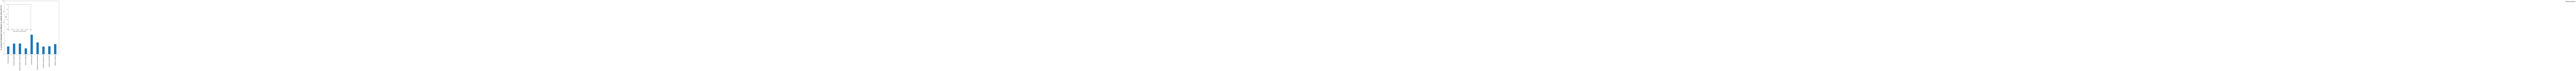

In [15]:
fig, ax = plt.subplots(figsize=(12,12))
font = {"fontname": "Arial"}

n_std = 3  # Number of standard deviations

### Bar plot ###
bar_width = 0.40 
ax.bar(negligible_senescing_species.keys(), bar_plot_data, bar_width)
ax.set_xticklabels(negligible_senescing_species.keys(), rotation=90, fontsize=14)
ax.set_ylabel("% covered of stipulated max lifespan in captivity when S(t)=0.2", fontsize=20, **font)
ax.set_ylim([0, 100])


### Left inserted panel ###
left, bottom, width, height = [0.18, 0.48, 0.32, 0.35] # Unitless percentages of the figure size where 0,0 is bottom left
ax2 = fig.add_axes([left, bottom, width, height])
ax2.set_xlabel("Years since sexual maturation",fontsize=12, **font)
ax2.set_ylabel("S(t)", fontsize=14, **font, labelpad=-2);
ax2.text(114, 1.1, r'$\it{Testudo}$ $\it{graeca}$', fontsize=16, **font)

# Mean S(t) based on reported mortality + senescence, black line
ax2.plot(range(t_max_cap), mean_cap_comb_f, 'k-', linewidth=1.0)
# S(t) +/- 3 std based on reported mortality, red shaded area
ax2.fill_between(range(t_max_cap), mean_cap - n_std * std_cap, mean_cap + n_std * std_cap, color='lightcoral', alpha=0.5)
# S(t) based on mortality from senescence only, blue line and shaded area
ax2.plot(range(t_max_so), mean_so_f, 'b-');
ax2.fill_between(range(t_max_so), mean_so_f - n_std * std_so_f, mean_so_f + n_std * std_so_f, color='lightblue', alpha=0.5)


### Right inserted panel ###
left, bottom, width, height = [0.565, 0.48, 0.32, 0.35] 
ax3 = fig.add_axes([left, bottom, width, height])
ax3.set_ylabel("S(t)", fontsize=14, **font, labelpad=-2)
ax3.set_xlabel("Years since sexual maturation", fontsize=12, **font)

# Mean S(t) from constant environmental mortality + senescence, black line
ax3.plot(range(t_max_cap), mean_cap_comb_sm, 'k-', linewidth=1.0)
# S(t) +/- 3 std from constant environmental mortality, red shaded area 
ax3.fill_between(range(t_max_cap), mean_cap_const - n_std * std_cap_const, mean_cap_const + n_std * std_cap_const, color='lightcoral', alpha=0.5)
# S(t) based on mortality from senescence only, blue line and shaded area
ax3.plot(range(t_max_so), mean_so_sm,'b-');
ax3.fill_between(range(t_max_so), mean_so_sm - n_std * std_so_sm, mean_so_sm + n_std * std_so_sm, color='lightblue', alpha=0.5);

# plt.savefig('Science_fig2.pdf', dpi = 600, bbox_inches="tight");